In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import tensorflow as tf
import keras 
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline



Using TensorFlow backend.


In [3]:
win87_data = pd.read_csv("Desktop/Triodor/Data CSVs/win87.csv")
win88_data = pd.read_csv("Desktop/Triodor/Data CSVs/win88.csv")
conv_data = pd.read_csv("Desktop/Triodor/Data CSVs/conversions.csv")

C:\Users\izzet.metin\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\izzet.metin\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
win87_data.head()

,ad_position,app_bundle,app_id,auction_id,bid_price_micros_usd,bid_time,category,clicks,conversions,conversion_order,...,platform_device_type,video_completes,video_skips,rewarded,clearing_price_micros,win_cost_micros,bid_price_micros,user_id,id,unique_row_id
0,FULLSCREEN,com.freeman.worldofpirateships,uty/eb67b572e0a34e415488829d4b3b1366,1564635113907629.2253277545.13567.improvedigital,11388,2019-08-01 00:51:53,NaN,0,0,0.0,...,MOBILE,True,False,True,11200,11801,12000,NaN,1,NaN
1,FULLSCREEN,bubbles.bounce,uty/a185d98b84ee17909991b83cbb14bb8e,1564636280265865.3628005743.13551.improvedigital,11388,2019-08-01 01:11:20,NaN,0,0,0.0,...,MOBILE,True,False,True,3440,3624,12000,NaN,2,NaN
2,FULLSCREEN,com.dg.puzzlebrothers.mahjong.solitaire.holida...,uty/4ec45a4f1f88b7068ede98b13db9fa5f,1564636322032120.1521153986.13529.improvedigital,11388,2019-08-01 01:12:02,NaN,0,0,0.0,...,MOBILE,True,False,True,5020,5289,12000,NaN,3,NaN
3,FULLSCREEN,com.foendrfg.tgteedf.gresedr,uty/899b77aba9bdc36194f8f24e2d77943b,1564637303752702.2940982169.13498.improvedigital,11388,2019-08-01 01:28:23,NaN,0,0,0.0,...,MOBILE,True,False,True,8390,8840,12000,NaN,4,NaN
4,FULLSCREEN,com.fishgame.gofishing.goldmoney.gp,uty/a6f60f9e95f05286a468b85dbe7e59e0,1564637316843222.3508351629.13515.improvedigital,11388,2019-08-01 01:28:36,NaN,0,0,0.0,...,MOBILE,True,False,True,11260,11864,12000,NaN,5,NaN


In [22]:
conv_data.head()

,buzz_key,conversion_id,ord,"""order""",rx_timestamp,tag_id,user_id,value,auction_id,is_gdpr,id,unique_row_id
0,improvedigital,1556683453889549.1556683184105283.2192325090.2...,NaN,NaN,2019-05-01 00:04:13,1,NaN,NaN,1556683184105283.2192325090.2525.improvedigital,False,530863,NaN
1,improvedigital,1556683478913801.1556502879418366.2736162883.2...,NaN,NaN,2019-05-01 00:04:38,1,NaN,NaN,1556502879418366.2736162883.2411.improvedigital,False,530864,NaN
2,improvedigital,1556683602389229.1556518516076773.2672500678.2...,NaN,NaN,2019-05-01 00:06:42,1,NaN,NaN,1556518516076773.2672500678.2573.improvedigital,False,530865,NaN
3,improvedigital,1556683677380532.1556653346841629.3467101763.2...,NaN,NaN,2019-05-01 00:07:57,1,NaN,NaN,1556653346841629.3467101763.2409.improvedigital,False,530866,NaN
4,improvedigital,1556683836903064.1556666588102576.3508351629.2...,NaN,NaN,2019-05-01 00:10:36,1,NaN,NaN,1556666588102576.3508351629.2438.improvedigital,False,530867,NaN


In [7]:
win88_data.head()

,ad_position,app_bundle,app_id,auction_id,bid_price_micros_usd,bid_time,category,clicks,conversions,conversion_order,...,platform_device_type,video_completes,video_skips,rewarded,clearing_price_micros,win_cost_micros,bid_price_micros,user_id,id,unique_row_id
0,FULLSCREEN,com.Meromsoft.SchoolGirlsSimulator,uty/f913c1bb0fb6c940322a7e47d6f48c41,1564632551330739.150776856.13472.improvedigital,11388,2019-08-01 00:09:11,NaN,0,0,0.0,...,TABLET,True,False,True,3980,4193,12000,NaN,1,NaN
1,FULLSCREEN,com.yasapets.hospital,uty/9bc22a640a83d13cbc7bcb211d29c165,1564633919895540.2479476496.13513.improvedigital,11388,2019-08-01 00:31:59,NaN,0,0,0.0,...,MOBILE,True,False,True,5910,6227,12000,NaN,2,NaN
2,FULLSCREEN,com.Meromsoft.SchoolGirlsSimulator,uty/f913c1bb0fb6c940322a7e47d6f48c41,1564633942314601.1230438437.13521.improvedigital,11388,2019-08-01 00:32:22,NaN,0,0,0.0,...,MOBILE,True,False,True,4150,4372,12000,NaN,3,NaN
3,FULLSCREEN,jp.garud.ssimulator,uty/2346d854dcea443c07f031e030de7eb4,1564634557895128.4220657602.13562.improvedigital,11388,2019-08-01 00:42:37,NaN,0,0,0.0,...,MOBILE,True,False,True,9340,9841,12000,NaN,4,NaN
4,FULLSCREEN,com.lockwoodpublishing.avakinlife,uty/6599b1288ff9c6ee36e8148d659e10c4,1564634912390894.1498551924.13528.improvedigital,11388,2019-08-01 00:48:32,NaN,0,0,0.0,...,MOBILE,True,False,True,11090,11685,12000,NaN,5,NaN


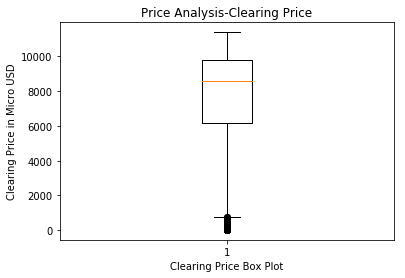

In [24]:
plt.boxplot(win87_data["clearing_price_micros"])
plt.title("Price Analysis-Clearing Price")
plt.xlabel("Clearing Price Box Plot")
plt.ylabel("Clearing Price in Micro USD")
plt.show()


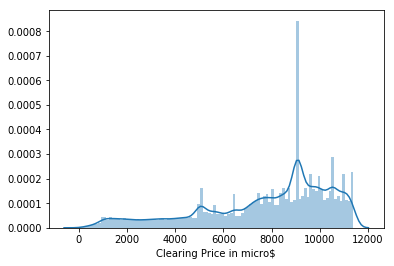

In [22]:
sns.distplot(win87_data["clearing_price_micros"], bins = 100)
plt.xlabel("Clearing Price in micro$")
plt.show()

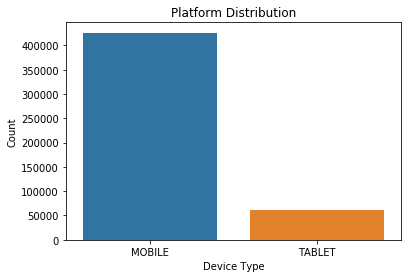

In [10]:
platform_device_type = win87_data["platform_device_type"]

sns.countplot(platform_device_type).set_title("Platform Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

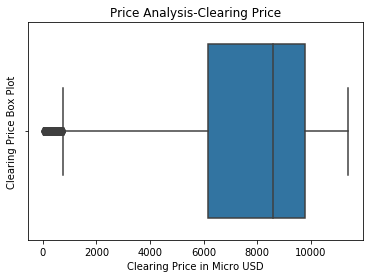

In [5]:
aplot =sns.boxplot(x = win87_data["clearing_price_micros"])
plt.title("Price Analysis-Clearing Price")
plt.ylabel("Clearing Price Box Plot")
plt.xlabel("Clearing Price in Micro USD")
plt.show()
#aplot = sns.stripplot(win87_data["clearing_price_micros"],jitter = True, color='black',alpha=0.75, marker = "o")

In [ ]:
platform_device_make = pd.read_csv("platformdevicemorethan5.csv")

sns.countplot(y = platform_device_make).set_title("Platform Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()


In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://scikit-learn.org/stable/_static/ml_map.png")

# Linear SVC and or Naive Bayes looks good for starters
 
